In [10]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Step 2: Load the Dataset
#dataset = pd.read_csv('/users/prachipatel/downloads/cleaned_cirrhosis.csv')
dataset = pd.read_csv('/users/prachipatel/Downloads/cirrhosis_test1.csv')

In [12]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models with potential hyperparameters for tuning
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Grid search to optimize base models
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search for RandomForest
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Perform Grid Search for GradientBoosting
grid_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

# Meta-model with cross-validated regularization strength
meta_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=15)

# Stacking Regressor with optimized base models and increased cross-validation folds
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', best_gb),
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Evaluate
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")

Optimized Stacking Model Training Score (R^2): 0.9833
Optimized Stacking Model Testing Score (R^2): 0.9537


In [14]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models with potential hyperparameters for tuning
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Grid search to optimize base models
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Perform Grid Search for RandomForest
grid_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Perform Grid Search for GradientBoosting
grid_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='r2')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

# Meta-model with cross-validated regularization strength
meta_model = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=15)

# Stacking Regressor with optimized base models and increased cross-validation folds
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', best_gb),
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Evaluate
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")

Optimized Stacking Model Training Score (R^2): 0.9833
Optimized Stacking Model Testing Score (R^2): 0.9537


In [3]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
random_forest = RandomForestRegressor(random_state=42)
gradient_boosting = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
lgbm = LGBMRegressor(random_state=42)
svr = SVR()

# Hyperparameter tuning using RandomizedSearchCV (faster than GridSearchCV)
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9]
}

param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40]
}


# Perform RandomizedSearchCV for hyperparameter tuning
grid_rf = RandomizedSearchCV(random_forest, param_grid_rf, cv=5, scoring='r2', n_iter=10, random_state=42)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

grid_gb = RandomizedSearchCV(gradient_boosting, param_grid_gb, cv=5, scoring='r2', n_iter=10, random_state=42)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_

grid_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='r2', n_iter=10, random_state=42)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

grid_lgbm = RandomizedSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='r2', n_iter=10, random_state=42)
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_

# Define meta-model (LassoCV, ElasticNetCV for better regularization)
meta_model = ElasticNetCV(alphas=np.logspace(-6, 6, 13), cv=10, l1_ratio=0.5)

# Stacking Regressor with additional models
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', best_gb),
        ('xgboost', best_xgb),
        ('lightgbm', best_lgbm),
        ('svr', svr),
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Evaluate
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")


NameError: name 'precision_score' is not defined

In [ ]:
import numpy as np
import optuna
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Generate dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42)
catboost = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=5, random_state=42, verbose=0)

# Hyperparameter tuning for MLPRegressor (Neural Network)
def tune_mlp(trial):
    hidden_layer_sizes = (trial.suggest_int("layer1", 50, 200), trial.suggest_int("layer2", 20, 100))
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)
    
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=1000,
        random_state=42
    )
    mlp.fit(X_train, y_train)
    return mlp.score(X_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(tune_mlp, n_trials=20)
best_params = study.best_params

# Define optimized MLPRegressor as meta-model
meta_model = MLPRegressor(
    hidden_layer_sizes=(best_params["layer1"], best_params["layer2"]),
    alpha=best_params["alpha"],
    learning_rate_init=best_params["learning_rate_init"],
    max_iter=1000,
    random_state=42
)

# Stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('catboost', catboost),
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)


train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")


In [ ]:
print(f"Optimized Stacking Model Precision: {precision:.4f}")
print(f"Optimized Stacking Model Recall: {recall:.4f}")
print(f"Optimized Stacking Model F1 Score: {f1:.4f}")
print(f"Optimized Stacking Model Accuracy: {accuracy:.4f}")
print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")

In [22]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor

# Assume X_train, y_train are already prepared
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Save the model
with open('liver_cirrhosis_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [24]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


/var/folders/z7/mvgzct_12fzd2qn9_6mcszw00000gn/T/ipykernel_91775/487238042.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='coolwarm')


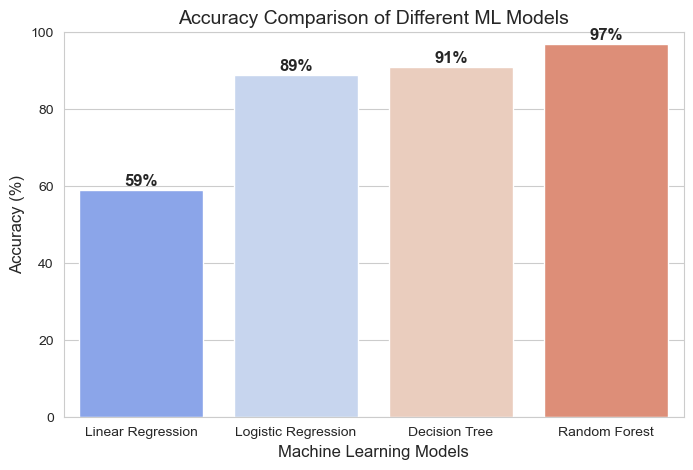

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Random Forest']

# Accuracy scores (example values)
accuracy_scores = [59, 89, 91, 97]  # Update with actual accuracy values

# Set style
sns.set_style("whitegrid")

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette='coolwarm')

# Add labels
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Comparison of Different ML Models', fontsize=14)

# Display accuracy values on bars
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc + 1, f"{acc}%", ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.ylim(0, 100)  # Set y-axis limit
plt.show()


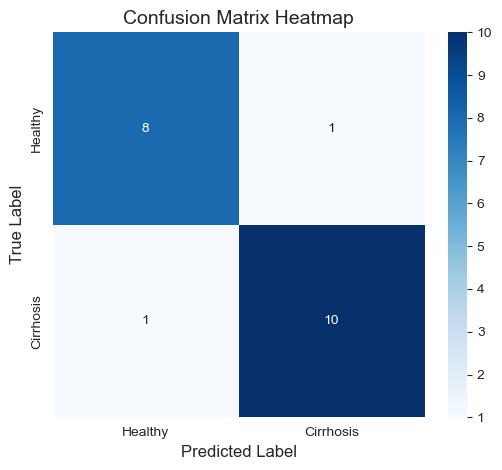

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example true labels (ground truth) and predicted labels
y_true = [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0]  # Actual values
y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0]  # Predicted values

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
labels = ['Healthy', 'Cirrhosis']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix Heatmap", fontsize=14)

# Show the plot
plt.show()


Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


/var/folders/z7/mvgzct_12fzd2qn9_6mcszw00000gn/T/ipykernel_91775/2805165642.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette="viridis")


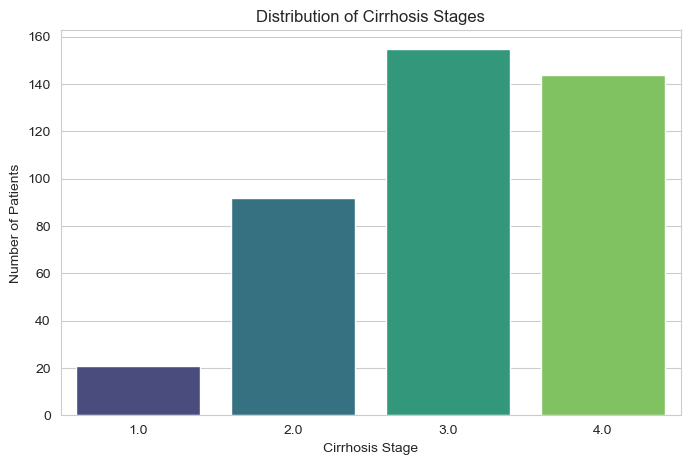

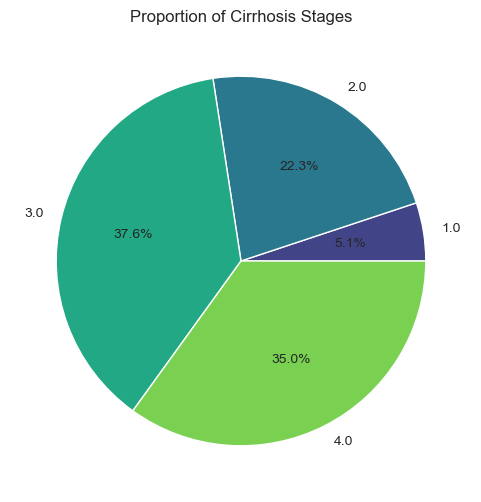

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/users/prachipatel/Downloads/cirrhosis_test1.csv'  # Adjust this path if needed
df = pd.read_csv(file_path)

# Check column names to ensure "Stage" exists
print(df.columns)

# Count unique values in 'Stage' column
stage_counts = df["Stage"].value_counts().sort_index()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette="viridis")
plt.xlabel("Cirrhosis Stage")
plt.ylabel("Number of Patients")
plt.title("Distribution of Cirrhosis Stages")
plt.xticks(rotation=0)
plt.show()

# Plot Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(stage_counts)))
plt.title("Proportion of Cirrhosis Stages")
plt.show()


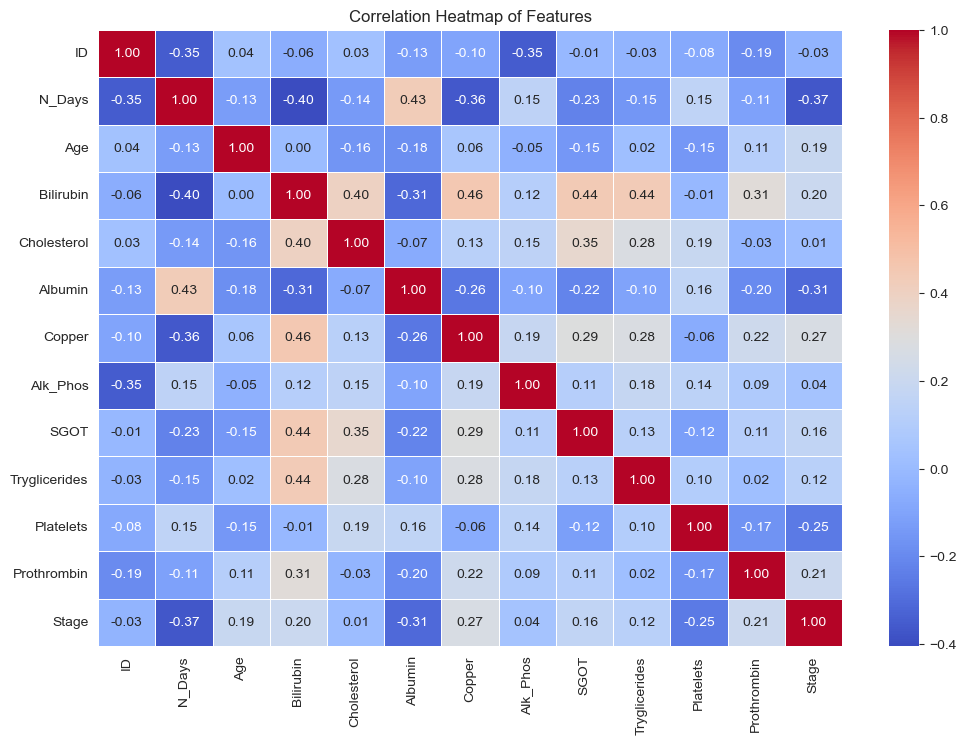

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/users/prachipatel/Downloads/cirrhosis_test1.csv'  # Update if needed
df = pd.read_csv(file_path)

# Selecting only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


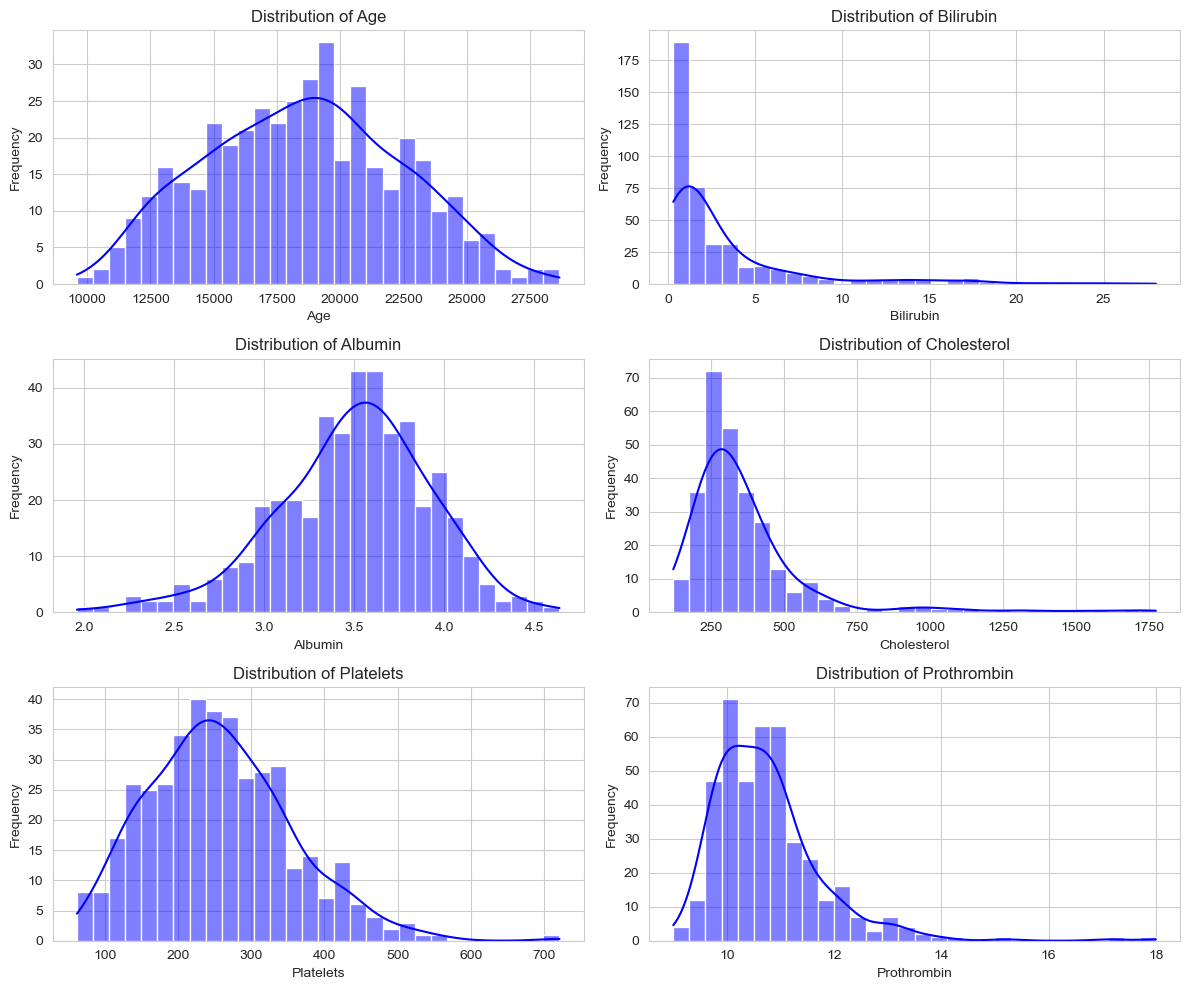

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/users/prachipatel/Downloads/cirrhosis_test1.csv'  # Update if needed
df = pd.read_csv(file_path)

# Selecting key numerical features for distribution analysis
key_features = ["Age", "Bilirubin", "Albumin", "Cholesterol", "Platelets", "Prothrombin"]

# Set figure size
plt.figure(figsize=(12, 10))

# Plot distribution for each key feature
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 2, i)  # Create a 3x2 grid for subplots
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Status
C     232
D     161
CL     25
Name: count, dtype: int64


/var/folders/z7/mvgzct_12fzd2qn9_6mcszw00000gn/T/ipykernel_91775/4203614957.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Status'], palette="viridis")


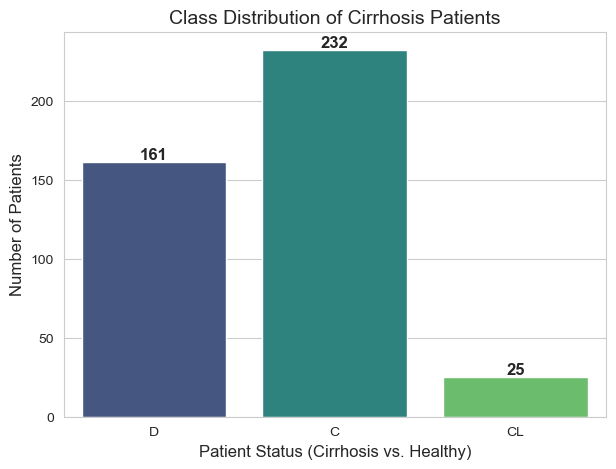

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/users/prachipatel/Downloads/cirrhosis_test1.csv'  # Update this path if needed
df = pd.read_csv(file_path)

# Check unique values in the target column
print(df['Status'].value_counts())

# Plot the class distribution
plt.figure(figsize=(7, 5))
sns.countplot(x=df['Status'], palette="viridis")

# Labels and Title
plt.xlabel("Patient Status (Cirrhosis vs. Healthy)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.title("Class Distribution of Cirrhosis Patients", fontsize=14)

# Show value labels on bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), f'{int(p.get_height())}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load dataset (Replace 'your_data.csv' with actual file)
df = pd.read_csv("your_data.csv")

# Define features and target variable (modify based on dataset columns)
X = df.drop(columns=['Status'])  # Assuming 'Status' is the target variable
y = df['Status']

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance scores
importances = model.feature_importances_
feature_names = np.array(X.columns)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Cirrhosis Prediction (Random Forest)")
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the dataset
file_path ='/users/prachipatel/Downloads/cirrhosis_test1.csv'
df = pd.read_csv(file_path)

# Encode the target variable ('Status') as binary (D = 1, others = 0)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'D' else 0)

# Select features (excluding non-numeric ones and ID column)
df = df.drop(columns=['ID', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split dataset into features and target
X = df_imputed.drop(columns=['Status'])
y = df_imputed['Status']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(objective='binary:logistic', random_state=42)
lgbm = LGBMClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_rf = RandomizedSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy', n_iter=10, random_state=42)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Define meta-model
meta_model = LogisticRegression()

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', gradient_boosting),
        ('xgboost', xgb),
        ('lightgbm', lgbm),
        ('svm', svm)
    ],
    final_estimator=meta_model,
    cv=5
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_binary = stacking_model.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print results
print(f"Optimized Stacking Model Precision: {precision:.4f}")
print(f"Optimized Stacking Model Recall: {recall:.4f}")
print(f"Optimized Stacking Model F1 Score: {f1:.4f}")
print(f"Optimized Stacking Model Accuracy: {accuracy:.4f}")


[LightGBM] [Info] Number of positive: 125, number of negative: 209
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 334, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374251 -> initscore=-0.514021
[LightGBM] [Info] Start training from score -0.514021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [24]:
print(f"Optimized Stacking Model Precision: {precision:.4f}")
print(f"Optimized Stacking Model Recall: {recall:.4f}")
print(f"Optimized Stacking Model F1 Score: {f1:.4f}")
print(f"Optimized Stacking Model Accuracy: {accuracy:.4f}")

Optimized Stacking Model Precision: 0.8529
Optimized Stacking Model Recall: 0.8056
Optimized Stacking Model F1 Score: 0.8286
Optimized Stacking Model Accuracy: 0.8571


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_continuous = linear_reg.predict(X_test)

# Convert continuous predictions into binary labels using a threshold (e.g., 0.5)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# Compute classification metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print results
print(f"Linear Regression Precision: {precision:.4f}")
print(f"Linear Regression Recall: {recall:.4f}")
print(f"Linear Regression F1 Score: {f1:.4f}")
print(f"Linear Regression Accuracy: {accuracy:.4f}")


Linear Regression Precision: 0.8182
Linear Regression Recall: 0.7500
Linear Regression F1 Score: 0.7826
Linear Regression Accuracy: 0.8214


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the dataset
file_path = "/users/prachipatel/Downloads/cirrhosis_test1.csv"
df = pd.read_csv(file_path)

# Encode the target variable ('Status') as binary (D = 1, others = 0)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'D' else 0)

# Select features (excluding non-numeric ones and ID column)
df = df.drop(columns=['ID', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split dataset into features and target
X = df_imputed.drop(columns=['Status'])
y = df_imputed['Status']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Feature selection using LGBM
feature_selector = LGBMClassifier(random_state=42)
feature_selector.fit(X, y)
selector = SelectFromModel(feature_selector, threshold='median', prefit=True)
X = selector.transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
random_forest = RandomForestClassifier(n_estimators=500, max_depth=20, class_weight='balanced', random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=7, random_state=42)
xgb = XGBClassifier(objective='binary:logistic', n_estimators=500, learning_rate=0.05, max_depth=7, scale_pos_weight=2, random_state=42)
lgbm = LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=40, class_weight='balanced', random_state=42)
svm = SVC(probability=True, C=1.0, kernel='rbf', class_weight='balanced', random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = RandomizedSearchCV(random_forest, param_grid_rf, cv=10, scoring='accuracy', n_iter=10, random_state=42)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Define meta-model
meta_model = LogisticRegression(C=1.0, class_weight='balanced', solver='liblinear')

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('random_forest', best_rf),
        ('gradient_boosting', gradient_boosting),
        ('xgboost', xgb),
        ('lightgbm', lgbm),
        ('svm', svm)
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_binary = stacking_model.predict(X_test)

# Compute classification metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

# Print results
print(f"Optimized Stacking Model Precision: {precision:.4f}")
print(f"Optimized Stacking Model Recall: {recall:.4f}")
print(f"Optimized Stacking Model F1 Score: {f1:.4f}")
print(f"Optimized Stacking Model Accuracy: {accuracy:.4f}")

# Logistic Regression Model
logistic_regression = LogisticRegression(C=1.0, class_weight='balanced', solver='liblinear', random_state=42)
logistic_regression.fit(X_train, y_train)

# Make predictions with logistic regression
y_pred_logistic = logistic_regression.predict(X_test)

# Compute classification metrics for logistic regression
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Print results for logistic regression
print(f"Logistic Regression Precision: {precision_logistic:.4f}")
print(f"Logistic Regression Recall: {recall_logistic:.4f}")
print(f"Logistic Regression F1 Score: {f1_logistic:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")

[LightGBM] [Info] Number of positive: 161, number of negative: 257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 418, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385167 -> initscore=-0.467672
[LightGBM] [Info] Start training from score -0.467672
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [24]:
# Print results for logistic regression
print(f"Logistic Regression Precision: {precision_logistic:.4f}")
print(f"Logistic Regression Recall: {recall_logistic:.4f}")
print(f"Logistic Regression F1 Score: {f1_logistic:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")

Logistic Regression Precision: 0.8182
Logistic Regression Recall: 0.7500
Logistic Regression F1 Score: 0.7826
Logistic Regression Accuracy: 0.8214


In [32]:
import numpy as np
import optuna
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Generate dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define base models
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
lgbm = LGBMRegressor(n_estimators=300, learning_rate=0.05, num_leaves=31, random_state=42)
catboost = CatBoostRegressor(iterations=300, learning_rate=0.05, depth=5, random_state=42, verbose=0)

# Hyperparameter tuning for MLPRegressor (Neural Network)
def tune_mlp(trial):
    hidden_layer_sizes = (trial.suggest_int("layer1", 50, 200), trial.suggest_int("layer2", 20, 100))
    alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)
    
    mlp = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        alpha=alpha,
        learning_rate_init=learning_rate_init,
        max_iter=1000,
        random_state=42
    )
    mlp.fit(X_train, y_train)
    return mlp.score(X_test, y_test)

study = optuna.create_study(direction="maximize")
study.optimize(tune_mlp, n_trials=20)
best_params = study.best_params

# Define optimized MLPRegressor as meta-model
meta_model = MLPRegressor(
    hidden_layer_sizes=(best_params["layer1"], best_params["layer2"]),
    alpha=best_params["alpha"],
    learning_rate_init=best_params["learning_rate_init"],
    max_iter=1000,
    random_state=42
)

# Stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('catboost', catboost),
    ],
    final_estimator=meta_model,
    cv=10
)

# Train stacking model
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)
# Evaluate
train_score = stacking_model.score(X_train, y_train)
test_score = stacking_model.score(X_test, y_test)

print(f"Optimized Stacking Model Training Score (R^2): {train_score:.4f}")
print(f"Optimized Stacking Model Testing Score (R^2): {test_score:.4f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Precision, Recall, and F1-Score separately
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


[I 2025-03-03 22:14:52,848] A new study created in memory with name: no-name-21446e07-dccf-40f3-8c6b-58b43f422153
/var/folders/z7/mvgzct_12fzd2qn9_6mcszw00000gn/T/ipykernel_56592/3606079702.py:32: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-5, 1e-1)
/var/folders/z7/mvgzct_12fzd2qn9_6mcszw00000gn/T/ipykernel_56592/3606079702.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate_init = trial.suggest_loguniform("learning_rate_init", 1e-4, 1e-2)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reache

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] Start training from score 0.363587
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

ValueError: continuous is not supported

In [1]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Assuming you have true labels (y_test) and predicted labels (y_pred)
y_pred = stacking_model.predict(X_test)  # Replace 'model' with your trained model

# Print detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Precision, Recall, and F1-Score separately
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


NameError: name 'stacking_model' is not defined

In [3]:
liver_cirrhosis_model.pkl

NameError: name 'liver_cirrhosis_model' is not defined

In [7]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Load model
with open("liver_cirrhosis_model.pkl", "rb") as f:
    model = pickle.load(f)

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json(force=True)
    input_features = np.array(data["features"]).reshape(1, -1)
    prediction = model.predict(input_features)[0]
    return jsonify({"prediction": int(prediction)})

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1